### module import

In [213]:
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
import matplotlib.pyplot as plt 

from fbprophet import Prophet
from datetime import datetime 

%matplotlib inline

# 문제 1) covid-19의 데이터 수집

- 2020년 1~2월부터 최소 600일 이상의 데이터

- 데이터 출처 : https://github.com/CSSEGISandData/COVID-19
    - 본 데이터는 존스 홉킨스 대학교의 COVID-19 데이터를 바탕으로 한다.  
    - 대한민국의 보건복지부 내 코로나 기록이 포함되어 있다.
    - time_series_covid19_confirmed_global.csv : 세계 확진자 수 시계열 데이터
    - time_series_covid19_deaths_global.csv : 세계 사망자 수 시계열 데이터

In [500]:
# confirmed_global 데이터 불러오기
df = pd.read_csv(
    "time_series_covid19_confirmed_global.csv",
    encoding='utf-8',
    index_col=1
)

df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580


In [501]:
# 정리하기

# 행 열 바꾸기
df_trans=df.transpose()

# 날짜가 기록된 행부터
df_date=df_trans[3:]

# len(df_date)

confirmed_global=df_date.rename_axis('date')
confirmed_global.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,2,0,0,0,0


In [502]:
# confirmed_kor 정리 : 한국 확진자수
confirmed_kor = pd.DataFrame(confirmed_global.loc[:, "Korea, South"])

# 컬럼명 변경 및 일일 값 추가
confirmed_kor.rename(columns = {"Korea, South" : "kor_conf_sum"}, inplace=True)
confirmed_kor['kor_conf_daily'] = confirmed_kor['kor_conf_sum'].diff().fillna(confirmed_kor['kor_conf_sum'])

confirmed_kor

,kor_conf_sum,kor_conf_daily
date,,
1/22/20,1,1
1/23/20,1,0
1/24/20,2,1
1/25/20,2,0
1/26/20,3,1
...,...,...
10/7/21,327976,2172
10/8/21,329925,1949
10/9/21,331519,1594


In [503]:
# 위와 동일한 방법으로 deaths_global 정리

# confirmed_global 데이터 불러오기
df = pd.read_csv(
    "time_series_covid19_deaths_global.csv",
    encoding='utf-8',
    index_col=1
)

# 정리하기

# 행 열 바꾸기
df_trans=df.transpose()

# 날짜가 기록된 행부터
df_date=df_trans[3:]

#len(df_date)

deaths_global=df_date.rename_axis('date')
deaths_global.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [504]:
# deathskor 정리 : 한국 사망자수
deaths_kor = pd.DataFrame(deaths_global.loc[:, "Korea, South"])

# 컬럼명 변경 및 일일 값 추가
deaths_kor.rename(columns = {"Korea, South" : "kor_death_sum"}, inplace=True)
deaths_kor['kor_death_daily'] = deaths_kor['kor_death_sum'].diff().fillna(deaths_kor['kor_death_sum'])

deaths_kor

,kor_death_sum,kor_death_daily
date,,
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
10/7/21,2554,10
10/8/21,2560,6
10/9/21,2575,15


## 정리
- confirmed_global : 세계 확진자 수 데이터 프레임(누적)
- deaths_global : 세계 사망자 수 데이터 프레임(누적)
- confirmed_kor : 한국 확진자 수 데이터 프레임(누적, 데일리)
- deaths_kor : 힌극 시밍자 수 데이터 프레임 (누적, 데일리)
- 629일치 데이터. 20년 1월 22일부터 21년 10월 11일까지

# 문제 2) 한국과 한국 외 4개 국가를 합친 전체 데이터 수집
- 한국과 비슷하거나 이상의 경제력을 가진 나라 4개국 선정
- 한국과 4개 국가 데이터를 결합해 전체 데이터로 설정
    - 2020년 세계 GDP 순위 : 10위인 대한민국 전후 나라 선정
    - 3위 일본(jap), 4위 독일(ger), 8위 이탈리아(ita), 11위 러시아(rus)

In [505]:
# confirmed_all

confirmed_all = confirmed_kor
#일본
confirmed = pd.DataFrame(confirmed_global.loc[:, 'Japan'])
confirmed.rename(columns = {'Japan' : "jap_conf_sum"}, inplace=True)
confirmed['jap_conf_daily'] = confirmed['jap_conf_sum'].diff().fillna(confirmed['jap_conf_sum'])
confirmed_all=pd.concat([confirmed_all,confirmed], axis=1)

#독일
confirmed = pd.DataFrame(confirmed_global.loc[:, 'Germany'])
confirmed.rename(columns = {'Germany' : "ger_conf_sum"}, inplace=True)
confirmed.head()
confirmed['ger_conf_daily'] = confirmed['ger_conf_sum'].diff().fillna(confirmed['ger_conf_sum'])
confirmed_all=pd.concat([confirmed_all,confirmed], axis=1)

#이탈리아
confirmed = pd.DataFrame(confirmed_global.loc[:, 'Italy'])
confirmed.rename(columns = {'Italy' : "ita_conf_sum"}, inplace=True)
confirmed['ita_conf_daily'] = confirmed['ita_conf_sum'].diff().fillna(confirmed['ita_conf_sum'])
confirmed_all=pd.concat([confirmed_all,confirmed], axis=1)

#러시아
confirmed = pd.DataFrame(confirmed_global.loc[:, 'Russia'])
confirmed.rename(columns = {'Russia' : "rus_conf_sum"}, inplace=True)
confirmed['rus_conf_daily'] = confirmed['rus_conf_sum'].diff().fillna(confirmed['rus_conf_sum'])
confirmed_all=pd.concat([confirmed_all,confirmed], axis=1)

In [506]:
confirmed_all

,kor_conf_sum,kor_conf_daily,jap_conf_sum,jap_conf_daily,ger_conf_sum,ger_conf_daily,ita_conf_sum,ita_conf_daily,rus_conf_sum,rus_conf_daily
date,,,,,,,,,,
1/22/20,1,1,2,2,0,0,0,0,0,0
1/23/20,1,0,2,0,0,0,0,0,0,0
1/24/20,2,1,2,0,0,0,0,0,0,0
1/25/20,2,0,2,0,0,0,0,0,0,0
1/26/20,3,1,4,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10/7/21,327976,2172,1709603,969,4295876,11476,4692274,2933,7575825,26881
10/8/21,329925,1949,1710426,823,4305634,9758,4695291,3017,7602386,26561
10/9/21,331519,1594,1711207,781,4312528,6894,4698038,2747,7631034,28648


In [507]:
# deaths_all

deaths_all = deaths_kor
#일본
deaths = pd.DataFrame(deaths_global.loc[:, 'Japan'])
deaths.rename(columns = {'Japan' : "jap_death_sum"}, inplace=True)
deaths['jap_death_daily'] = deaths['jap_death_sum'].diff().fillna(deaths['jap_death_sum'])
deaths_all=pd.concat([deaths_all,deaths], axis=1)

#독일
deaths = pd.DataFrame(deaths_global.loc[:, 'Germany'])
deaths.rename(columns = {'Germany' : "ger_death_sum"}, inplace=True)
deaths.head()
deaths['ger_death_daily'] = deaths['ger_death_sum'].diff().fillna(deaths['ger_death_sum'])
deaths_all=pd.concat([deaths_all,deaths], axis=1)

#이탈리아
deaths = pd.DataFrame(deaths_global.loc[:, 'Italy'])
deaths.rename(columns = {'Italy' : "ita_death_sum"}, inplace=True)
deaths['ita_death_daily'] = deaths['ita_death_sum'].diff().fillna(deaths['ita_death_sum'])
deaths_all=pd.concat([deaths_all,deaths], axis=1)

#러시아
deaths = pd.DataFrame(deaths_global.loc[:, 'Russia'])
deaths.rename(columns = {'Russia' : "rus_death_sum"}, inplace=True)
deaths['rus_death_daily'] = deaths['rus_death_sum'].diff().fillna(deaths['rus_death_sum'])
deaths_all=pd.concat([deaths_all,deaths], axis=1)

In [508]:
deaths_all

,kor_death_sum,kor_death_daily,jap_death_sum,jap_death_daily,ger_death_sum,ger_death_daily,ita_death_sum,ita_death_daily,rus_death_sum,rus_death_daily
date,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10/7/21,2554,10,17872,39,94117,86,131198,41,209752,910
10/8/21,2560,6,17918,46,94182,65,131228,30,210673,921
10/9/21,2575,15,17945,27,94206,24,131274,46,211627,954


## 정리
- confirmed_all : 5개국 전체 데이터의 확진자수 (누적, 데일리)
- deaths_all : 5개국 전체 데이터의 사망자수 (누적, 데일리)


# 문제3) 전체 데이터의 확진자수, 사망자수 시각화
- 전체 데이터에 구성된 5개 국가들의 확진자수, 사망자수 시각화
- 특정 기간 이후 5개 국가들의 확진자수 시각화

In [509]:
confirmed_all.columns

Index(['kor_conf_sum', 'kor_conf_daily', 'jap_conf_sum', 'jap_conf_daily',
       'ger_conf_sum', 'ger_conf_daily', 'ita_conf_sum', 'ita_conf_daily',
       'rus_conf_sum', 'rus_conf_daily'],
      dtype='object')

In [510]:
confirmed_all=confirmed_all.reset_index()
deaths_all=deaths_all.reset_index()

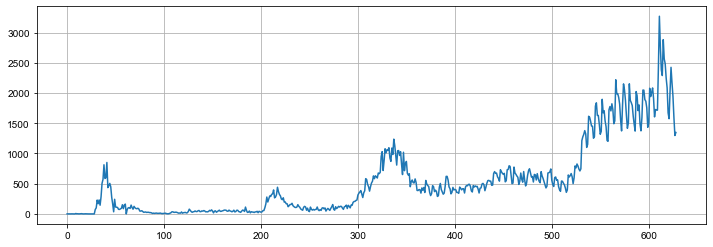

In [511]:
# 한국 확진자 수 그래프로 보기 : kor_conf_daily
confirmed_all["kor_conf_daily"].plot(figsize=(12, 4), grid=True);

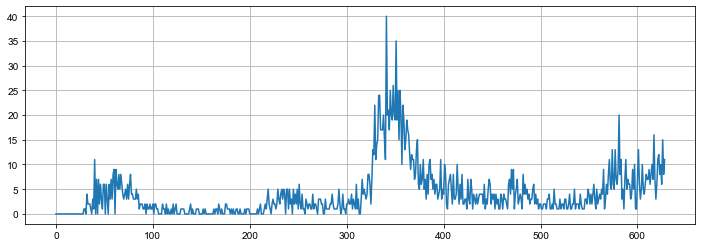

In [512]:
# 한국 사망자 수 그래프로 보기 : kor_conf_daily
deaths_all["kor_death_daily"].plot(figsize=(12, 4), grid=True);

## 정리1 - 5개국 전체 기간 일별 확진자 수
- 아래 그래프를 통해 5개국 확진자 수의 추이를 한눈에 볼 수 있다.
- 100일 이전 유럽의 코로나 범유행으로 독일, 이탈리아의 확진자가 급속도로 늘었다.
- 100일 이후로는 러시아가 계속해서 높은 확진자 수를 보여주다가 250일차 쯤 폭발적으로 증가하는 상황이다.
    - 추가적으로 250일 이후 현황을 살펴보자.

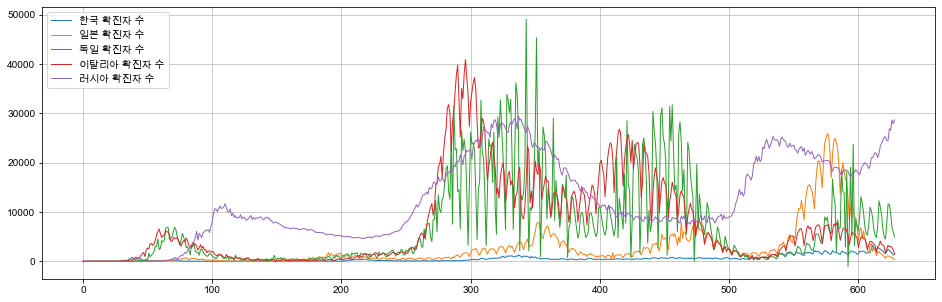

In [513]:
# 5개국 확진자 수 그래프 한번에 보기 : 한국, 일본, 독일, 캐나다, 러시아

plt.figure(figsize=(16, 5))
plt.plot(confirmed_all["kor_conf_daily"], lw=1, label='한국 확진자 수')
plt.plot(confirmed_all["jap_conf_daily"], lw=1, label='일본 확진자 수')
plt.plot(confirmed_all["ger_conf_daily"], lw=1, label='독일 확진자 수')
plt.plot(confirmed_all["ita_conf_daily"], lw=1, label='이탈리아 확진자 수')
plt.plot(confirmed_all["rus_conf_daily"], lw=1, label='러시아 확진자 수')


plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

## 정리2 - 5개국 특정 기간 일별 확진자 수
- 아래 그래프를 통해 250일(20년 9월 28일 이후) 5개국 확진자 수의 추이를 한눈에 볼 수 있다.
- 유럽에 속하는 국가 (독일, 이탈리아)의 경우 큰 폭으로 확진자 수가 늘었다, 줄었다 반복하는 양상을 보인다.
- 500일 이후에는 이탈리아를 제외하고 나머지 국가는 감소 추세를 보인다. (백신의 영향이 있을까? 이는 차후에 알아보도록 하자.)
 - 한국의 경우 꾸준하게 (비교적으로) 적은 확진자 수를 보인다.

In [514]:
confirmed_250=confirmed_all[250:]
#confirmed_250.head()

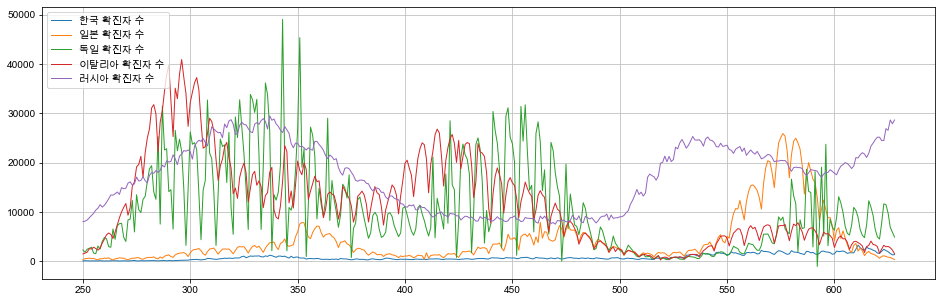

In [515]:
plt.figure(figsize=(16, 5))
plt.plot(confirmed_250["kor_conf_daily"], lw=1, label='한국 확진자 수')
plt.plot(confirmed_250["jap_conf_daily"], lw=1, label='일본 확진자 수')
plt.plot(confirmed_250["ger_conf_daily"], lw=1, label='독일 확진자 수')
plt.plot(confirmed_250["ita_conf_daily"], lw=1, label='이탈리아 확진자 수')
plt.plot(confirmed_250["rus_conf_daily"], lw=1, label='러시아 확진자 수')


plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

## 정리3 - 5개국 전체 기간 일별 사망자 수
- 확진자 그래프의 추이와 더불어 100일 이전 이탈리아, 독일의 사망자 수가 높은 양상을 보인다.
- 100여일 이후부터 250여일 까지는 줄어든 양상이지만 300여일에 모든 국가가 높은 폭으로 증가했다. 
- 500여일 이후에 감소하는 양상을 보이지만 러시아의 경우에는 오히려 증가하고 있다.
- 한국의 경우 다른 나라에 비해 비교적 적은 사망자 수를 보이고 있다. (인구 수가 적기 때문이 아닐까 추측한다.)

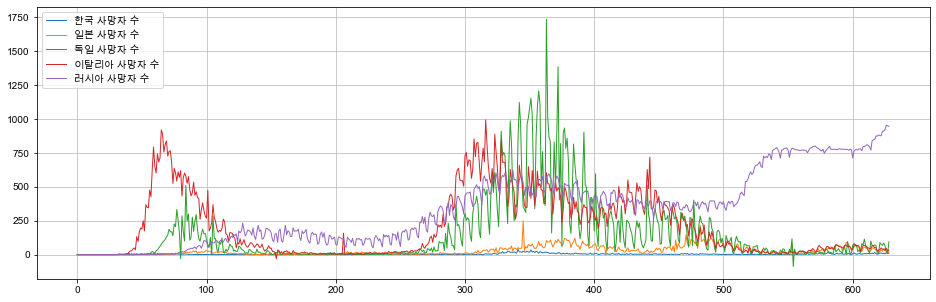

In [516]:
# 5개국 확진자 수 그래프 한번에 보기 : 한국, 일본, 독일, 캐나다, 러시아

plt.figure(figsize=(16, 5))
plt.plot(deaths_all["kor_death_daily"], lw=1, label='한국 사망자 수')
plt.plot(deaths_all["jap_death_daily"], lw=1, label='일본 사망자 수')
plt.plot(deaths_all["ger_death_daily"], lw=1, label='독일 사망자 수')
plt.plot(deaths_all["ita_death_daily"], lw=1, label='이탈리아 사망자 수')
plt.plot(deaths_all["rus_death_daily"], lw=1, label='러시아 사망자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

## 추가 - 5개국 전체 기간 누적 확진자 수, 5개국 전체 기간 누적 사망자 수
- 확진자 수 누적 비교 : 러시아 > 이탈리아 > 독일 > 일본 > 한국 순
- 사망자 수 누적 비교  
    - 약 500여일 이전 : 이탈리아 > 러시아 > 독일 > 일본 > 한국 순
    - 약 500여일 이후 : 러시아 > 이탈리아 > 독일 > 일본 > 한국 순


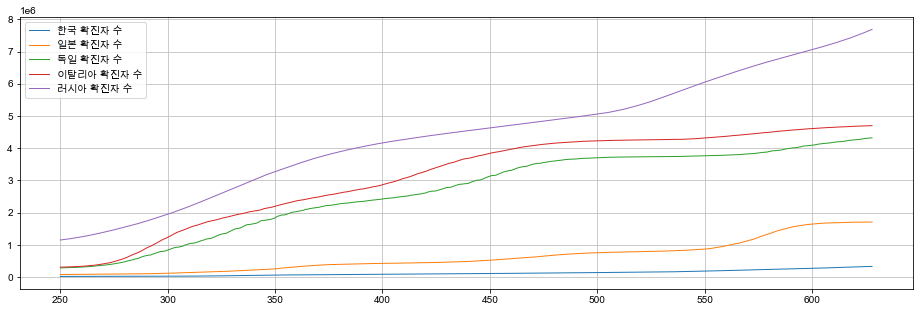

In [517]:
plt.figure(figsize=(16, 5))
plt.plot(confirmed_250["kor_conf_sum"], lw=1, label='한국 확진자 수')
plt.plot(confirmed_250["jap_conf_sum"], lw=1, label='일본 확진자 수')
plt.plot(confirmed_250["ger_conf_sum"], lw=1, label='독일 확진자 수')
plt.plot(confirmed_250["ita_conf_sum"], lw=1, label='이탈리아 확진자 수')
plt.plot(confirmed_250["rus_conf_sum"], lw=1, label='러시아 확진자 수')


plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

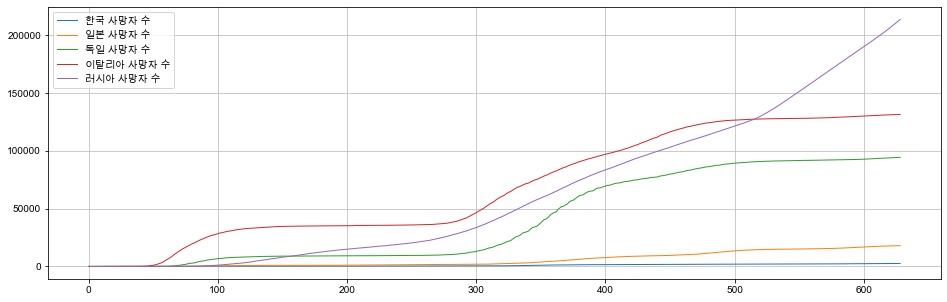

In [518]:
# 5개국 확진자 수 그래프 한번에 보기 : 한국, 일본, 독일, 캐나다, 러시아

plt.figure(figsize=(16, 5))
plt.plot(deaths_all["kor_death_sum"], lw=1, label='한국 사망자 수')
plt.plot(deaths_all["jap_death_sum"], lw=1, label='일본 사망자 수')
plt.plot(deaths_all["ger_death_sum"], lw=1, label='독일 사망자 수')
plt.plot(deaths_all["ita_death_sum"], lw=1, label='이탈리아 사망자 수')
plt.plot(deaths_all["rus_death_sum"], lw=1, label='러시아 사망자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

# 문제4) 전체 데이터의 확진자, 사망자수 비율 표현
- 비율 표현을 위해서 전체 인구수 조사
    - https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population  
    5개 국가의 인구 수 출처
    - 한국 : 51,671,569
    - 일본 : 125,210,000
    - 독일 : 83,129,285
    - 이탈리아 : 59,108,671
    - 러시아 : 146,171,015

In [519]:
# 누적 데이터만 확인할 수 있는 데이터 프레임 만들기 (confirmed_sum, deaths_sum)
confirmed_sum=confirmed_all[["date", "kor_conf_sum", "jap_conf_sum", "ger_conf_sum", "ita_conf_sum", "rus_conf_sum"]]
deaths_sum=deaths_all[["date", "kor_death_sum", "jap_death_sum", "ger_death_sum", "ita_death_sum", "rus_death_sum"]]

In [520]:
# 인구수 대비 확진자 비율을 확인할 수 있는 데이터 프레임 만들기 (confirmed_rate)

pop=pd.Series({'kor': 51671569,
                'jap' : 125210000,
                'ger' : 83129285,
                'ita' : 59108671,
                'rus' : 146171015})

col=confirmed_sum.columns[1:]

confirmed_rate = pd.DataFrame()
confirmed_rate['date'] = confirmed_sum['date']

for a, b in zip(col, pop.values):
    confirmed_rate[a] = confirmed_sum[a]/b*100

confirmed_rate.tail(3)


,date,kor_conf_sum,jap_conf_sum,ger_conf_sum,ita_conf_sum,rus_conf_sum
626,10/9/21,0.641589,1.36667,5.187736,7.948137,5.220621
627,10/10/21,0.644099,1.367108,5.194844,7.951991,5.2397
628,10/11/21,0.646706,1.367404,5.20075,7.954555,5.259291


In [521]:
# 인구수 대비 사망자 비율을 확인할 수 있는 데이터 프레임 만들기 (deaths_rate)

pop=pd.Series({'kor': 51671569,
                'jap' : 125210000,
                'ger' : 83129285,
                'ita' : 59108671,
                'rus' : 146171015})

col=deaths_sum.columns[1:]

deaths_rate = pd.DataFrame()
deaths_rate['date'] = deaths_sum['date']

for a, b in zip(col, pop.values):
    deaths_rate[a] = deaths_sum[a]/b*100

deaths_rate.tail(3)

,date,kor_death_sum,jap_death_sum,ger_death_sum,ita_death_sum,rus_death_sum
626,10/9/21,0.004983,0.014332,0.113325,0.222089,0.14478
627,10/10/21,0.004999,0.014338,0.113333,0.222135,0.14543
628,10/11/21,0.00502,0.014353,0.113447,0.222192,0.146077


## 정리1 - 5개국 전체 기간 인구수 대비 확진자 (누적)
- 아래는 인구수 대비 확진자 그래프이다.
- 확진자 수로는 러시아가 가장 많았으나 비율로는 3번째이다.
- 반면 이탈리아의 확진자 비율은 다른 나라에 비해 가장 높다.
- 이탈리아 > 독일 > 러시아 > 일본 > 한국 순이다.

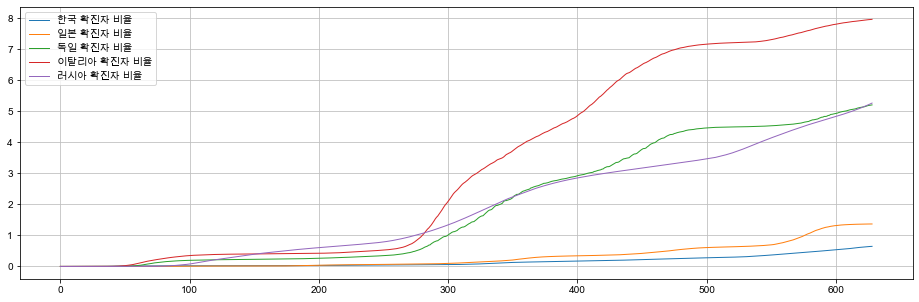

In [632]:
#시각화 

def confRatePlot():

    plt.figure(figsize=(16, 5))
    plt.plot(confirmed_rate["kor_conf_sum"], lw=1, label='한국 확진자 비율')
    plt.plot(confirmed_rate["jap_conf_sum"], lw=1, label='일본 확진자 비율')
    plt.plot(confirmed_rate["ger_conf_sum"], lw=1, label='독일 확진자 비율')
    plt.plot(confirmed_rate["ita_conf_sum"], lw=1, label='이탈리아 확진자 비율')
    plt.plot(confirmed_rate["rus_conf_sum"], lw=1, label='러시아 확진자 비율')


    plt.grid(True, linestyle="-", color="0.75")
    plt.legend(loc=2)
    plt.show()

confRatePlot()

## 정리2 - 5개국 전체 기간 인구수 대비 사망자 (누적)
- 아래는 인구수 대비 사망자 그래프이다.
- 러시아가 500여일 이후로는 가장 높은 사망자 수를 보였으나 비율로 살펴본 결과 여전히 이탈리아 사망자가 높다. 
- 이탈리아 > 독일,러시아 > 일본,한국 순이다.

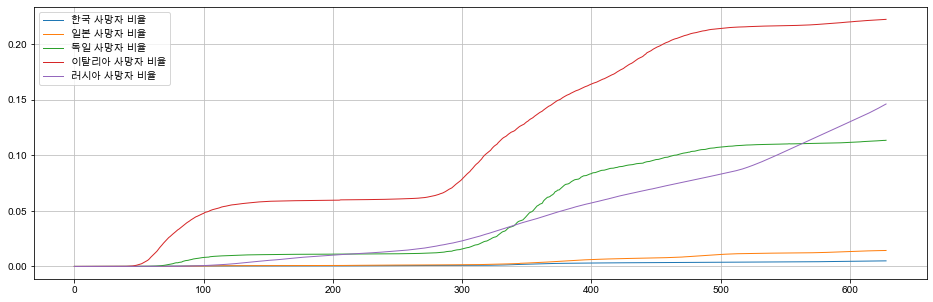

In [634]:
# 시각화

def deathRatePlot():

    plt.figure(figsize=(16, 5))
    plt.plot(deaths_rate["kor_death_sum"], lw=1, label='한국 사망자 비율')
    plt.plot(deaths_rate["jap_death_sum"], lw=1, label='일본 사망자 비율')
    plt.plot(deaths_rate["ger_death_sum"], lw=1, label='독일 사망자 비율')
    plt.plot(deaths_rate["ita_death_sum"], lw=1, label='이탈리아 사망자 비율')
    plt.plot(deaths_rate["rus_death_sum"], lw=1, label='러시아 사망자 비율')

    plt.grid(True, linestyle="-", color="0.75")
    plt.legend(loc=2)
    plt.show()

deathRatePlot()

# 문제5) 전체 데이터의 시계열 분석을 통한 트렌드, 주기별 특성 관찰
- 어떤 특이한 현상이 있는지 파악
- 각 국가 covid19 현황(확진자수, 사망자수)의 시계열 분석, 트랜드, 주기 파악

## 1. 확진자 시계열 분석

### 1) 한국 확진자 시계열 분석

In [524]:
df = pd.DataFrame({"ds": confirmed_all.date, 
                    "y": confirmed_all["kor_conf_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

df.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,0
2,2020-01-24,1
3,2020-01-25,0
4,2020-01-26,1


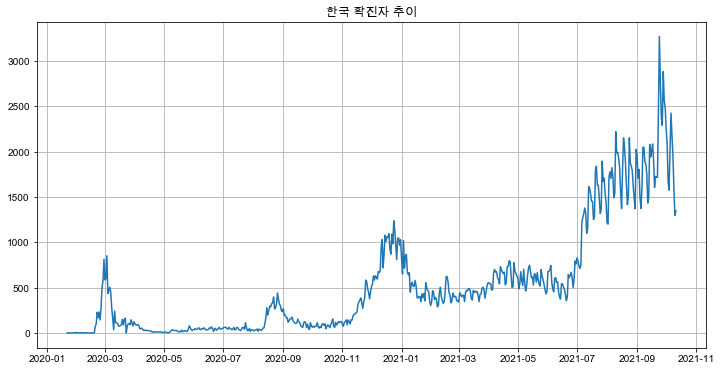

In [525]:
# 전체 데이터 그려보기 
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.title("한국 확진자 추이")
plt.show()

In [526]:
# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -6.91029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1548.59    0.00790129       206.785      0.5619      0.5619      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1554.75   0.000156512       48.5714     0.05616      0.8914      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1557.01    0.00165727       125.763           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1558.7    0.00475078       87.6151       0.577           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474        1559.2   0.000993125       112.887   1.117e-05       0.001      621  LS failed, Hessian reset 
     499       1559.36    0.00222935    

,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,3234.821137,3031.255733,3438.309323
685,2021-12-07,3422.944964,3223.426230,3619.041669
686,2021-12-08,3458.596675,3241.156903,3660.300039
687,2021-12-09,3500.363773,3288.210190,3706.229928
688,2021-12-10,3543.722739,3335.836303,3744.181553


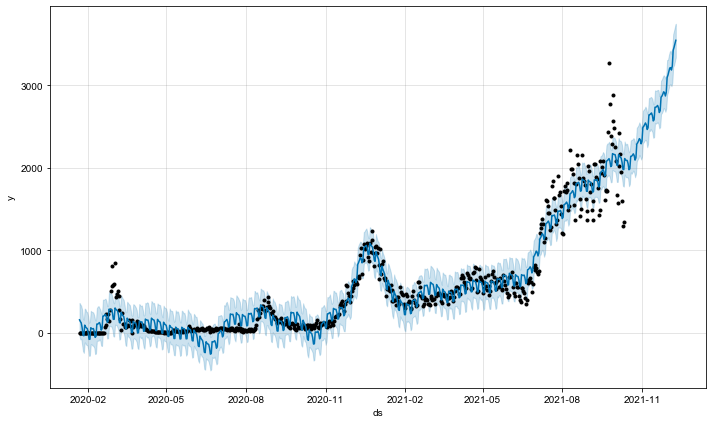

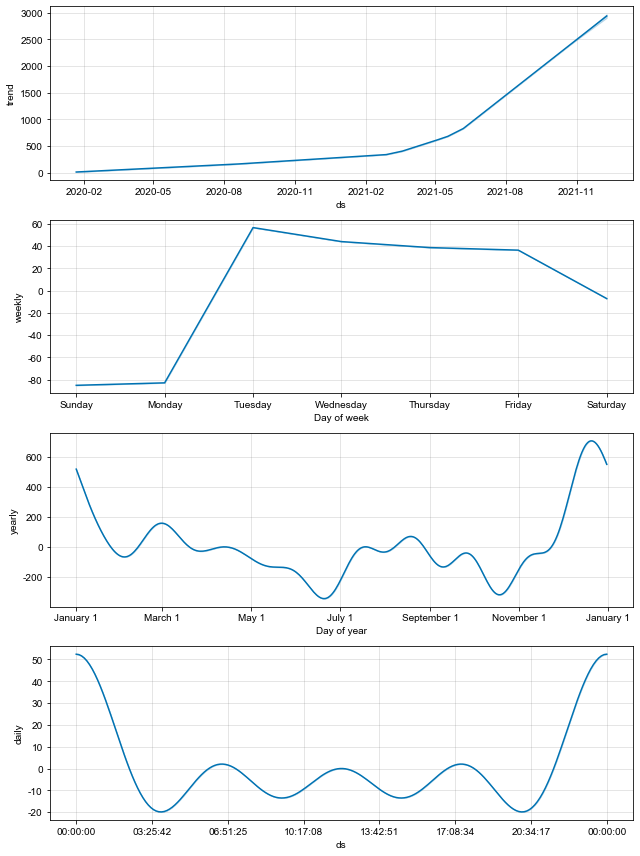

In [527]:
m.plot(forecast);
m.plot_components(forecast);

<그래프 해석>
- plot으로 전체 경향을 파악해보자.
    1. 2020년 3월 두드러진 상승세를 보인다.
    - 당시 대구 종교시설 코로나 집단감염이 발생했을 시기이다.
    2. 2020년 12년부터 2021년 1월 쯤 급격한 상승세를 보이다가 감소한다.
    3. 점차 안정적인듯 하다가 2021년 6~7월 전국적으로 다시 확진자가 증가하기 시작한다.

-----
    
- plot_components를 살펴보자.
    - 주간(weekly) 그래프에서는 화,수,목,금요일이 비교적으로 높은 경향을 보인다.

### 2) 일본 확진자 시계열 분석

In [528]:
df = pd.DataFrame({"ds": confirmed_all.date, 
                    "y": confirmed_all["jap_conf_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

df.head()

,ds,y
0,2020-01-22,2
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,2


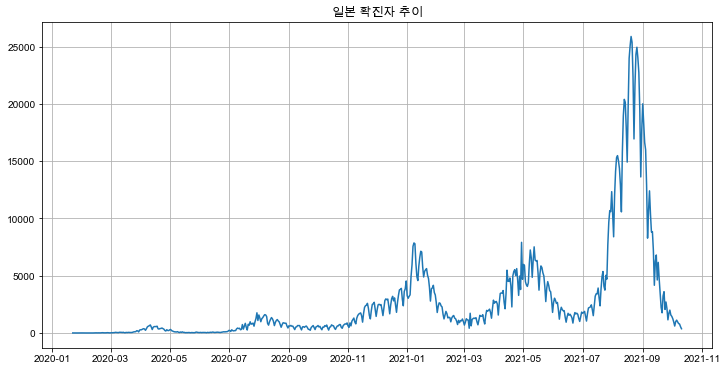

In [529]:
# 전체 데이터 그려보기 
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.title("일본 확진자 추이")
plt.show()

In [530]:
# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -13.9776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1180.7    0.00176136        63.215           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       1181.22   0.000452357       124.342    5.15e-06       0.001      160  LS failed, Hessian reset 
     199       1184.08   0.000577806       80.7012      0.2394           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       1184.33   0.000837381       173.245   9.222e-06       0.001      393  LS failed, Hessian reset 
     299        1184.4   7.14998e-05       89.4075      0.8781      0.8781      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1184.42   2.14027e-06       84.1852      0.5411      0.5411      545   
    Iter      log pro

,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,9135.015208,6181.329279,12122.557217
685,2021-12-07,9796.682855,6801.221014,12794.616453
686,2021-12-08,10198.544116,7192.364537,13123.705570
687,2021-12-09,10283.384765,7145.840491,13223.413626
688,2021-12-10,10150.088225,7040.746634,13213.351550


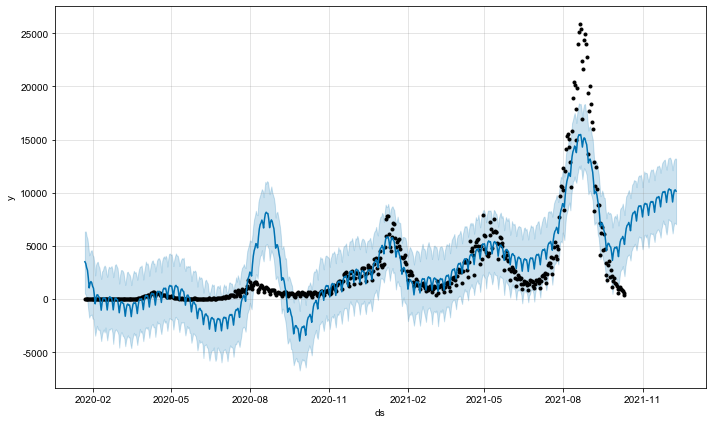

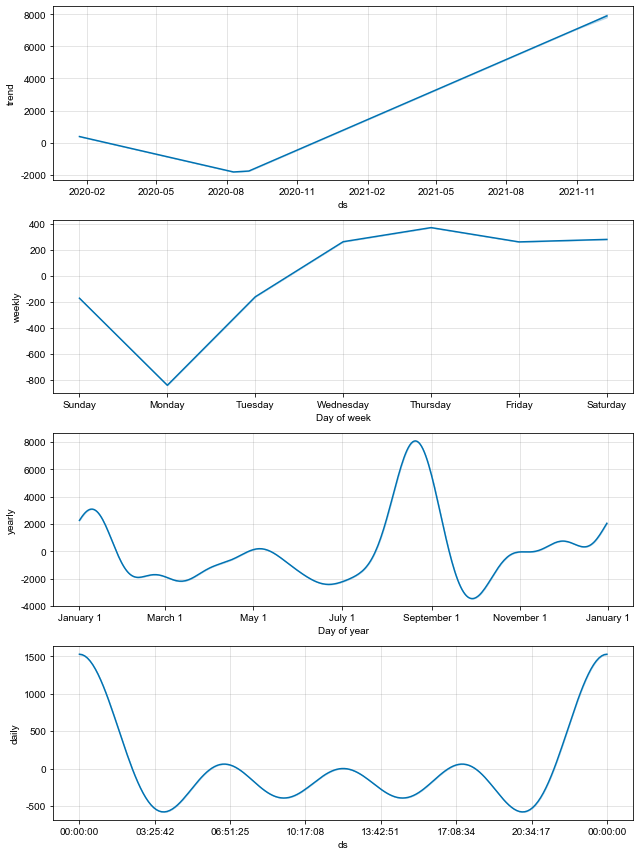

In [531]:
m.plot(forecast);
m.plot_components(forecast);

<그래프 해석>
- plot으로 전체 경향을 파악해보자.
    1. 2020년 9월, 2021년 1월, 5월, 8~9월 두드러진 상승세를 보이다가 감소한다.
    - 특히 2021년 8~9월에 급격한 상승세가 있다가 감소했다. 이는 백신의 영향이 있을 것으로 추측할 수 있다.

-----
    
- plot_components를 살펴보자.
    - 주간(weekly) 그래프에서는 수, 목, 금, 토요일이 비교적으로 높은 경향을 보인다.

### 3) 독일 확진자 시계열 분석

In [532]:
df = pd.DataFrame({"ds": confirmed_all.date, 
                    "y": confirmed_all["ger_conf_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


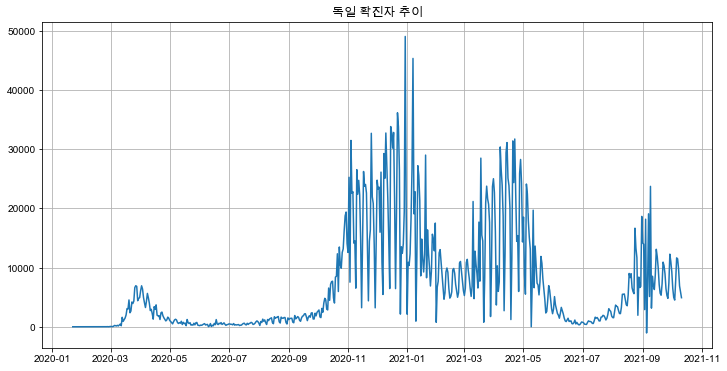

In [533]:
# 전체 데이터 그려보기 
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.title("독일 확진자 추이")
plt.show()

In [534]:
# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -13.1254
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1168.3   0.000593195        59.399           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1169.58    0.00195059       272.924   1.678e-05       0.001      222  LS failed, Hessian reset 
     199        1170.3   2.51056e-05       61.2596           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1170.35   4.02362e-06       79.5356           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       1170.36   3.12542e-05       72.4491   3.433e-07       0.001      488  LS failed, Hessian reset 
     371       1170.36   6.39868e-07       74.2566    7.29e-09       0.001      599  LS failed, Hessian rese

,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,22551.379580,16789.300549,28283.755309
685,2021-12-07,26411.469444,20702.903543,32670.248333
686,2021-12-08,28363.394448,22363.696571,34462.208743
687,2021-12-09,28136.168484,21983.232154,33868.962334
688,2021-12-10,26385.562196,20236.286869,32037.704743


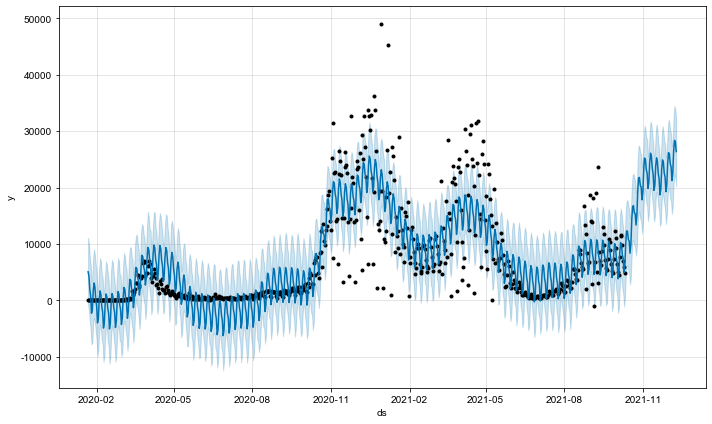

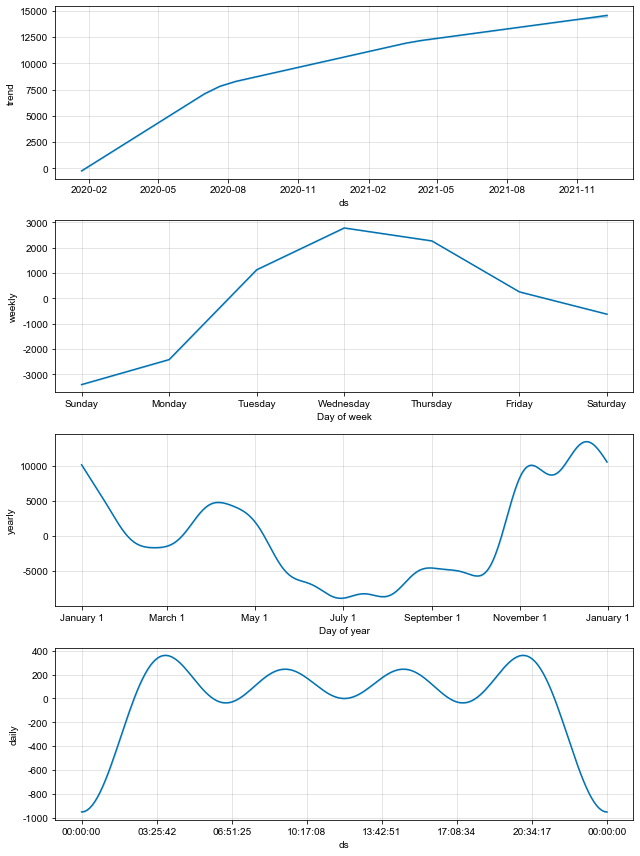

In [535]:
m.plot(forecast);
m.plot_components(forecast);

<그래프 해석>
   
- plot_components를 살펴보자.
    - 주간(weekly) 그래프에서는 수요일이 눈에 띄게 높다.
    - 연간(yearly) 그래프에서는 1월, 4월, 11월 이후 높아진다.

### 4) 이탈리아 확진자 시계열 분석

In [536]:
df = pd.DataFrame({"ds": confirmed_all.date, 
                    "y": confirmed_all["ita_conf_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


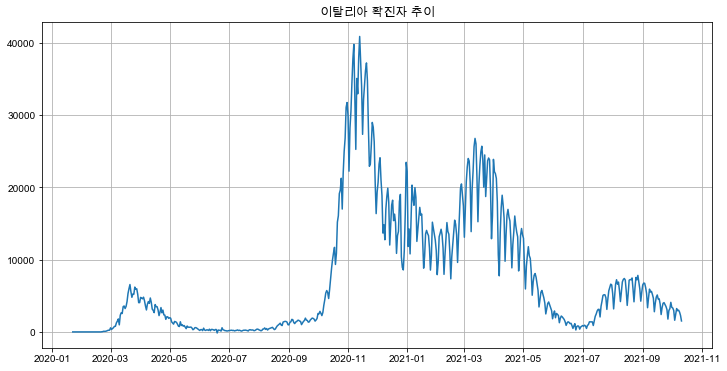

In [537]:
# 전체 데이터 그려보기 
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.title("이탈리아 확진자 추이")
plt.show()

In [538]:
# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -24.4682
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1519.18    0.00519207       216.195           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          1529     0.0579153       245.103       3.453      0.3453      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1532.67   0.000440959       106.737      0.6194      0.6194      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1533.52   6.27647e-07       72.3781      0.5092      0.5092      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1533.6   1.82215e-06       68.3042      0.7666      0.7666      634   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,17021.341865,14627.620302,19715.075456
685,2021-12-07,17658.513818,14908.580778,20281.010831
686,2021-12-08,18302.094617,15576.293553,20795.274679
687,2021-12-09,18565.813199,15877.353852,21084.099328
688,2021-12-10,18280.074663,15837.581924,20936.914024


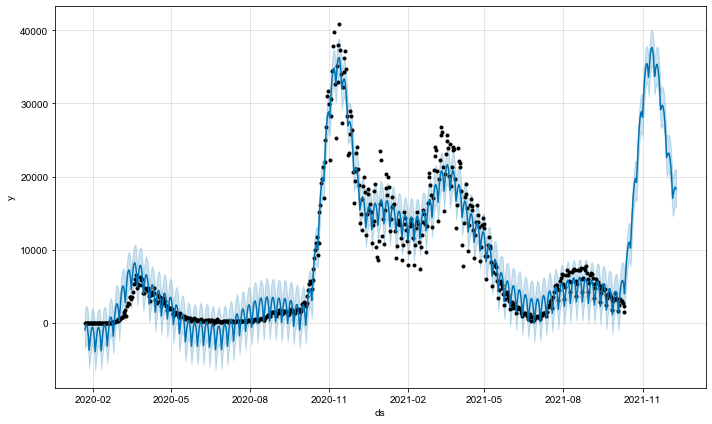

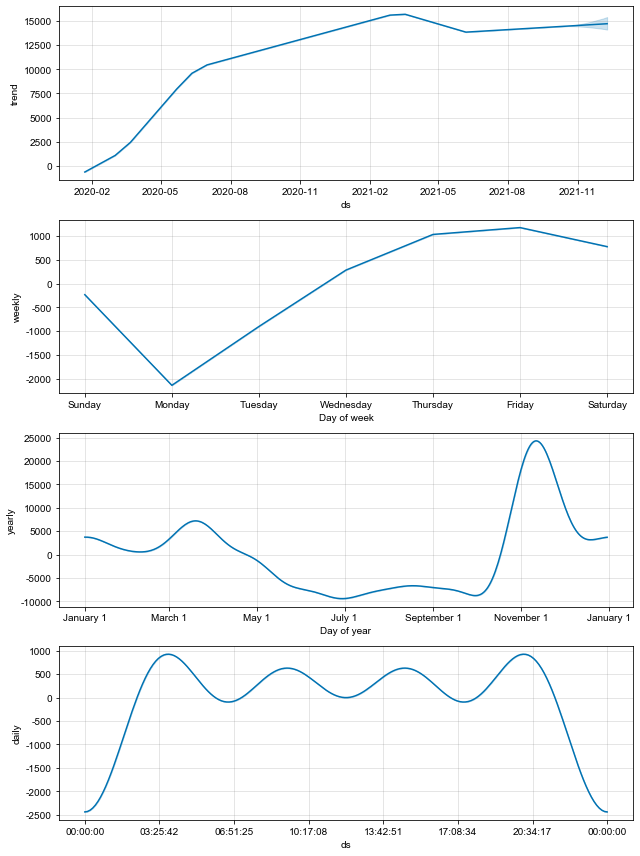

In [539]:
m.plot(forecast);
m.plot_components(forecast);

<그래프 해석>
   
- plot_components를 살펴보자.
    - 주간(weekly) 그래프에서는 목, 금, 토요일로 갈수록 높아지는 경향을 보인다.
    - 연간(yearly) 그래프에서는 11월에 눈에띄게 높아지는 경향이다.

### 5) 러시아 확진자 시계열 분석

In [540]:
df = pd.DataFrame({"ds": confirmed_all.date, 
                    "y": confirmed_all["rus_conf_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

df.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


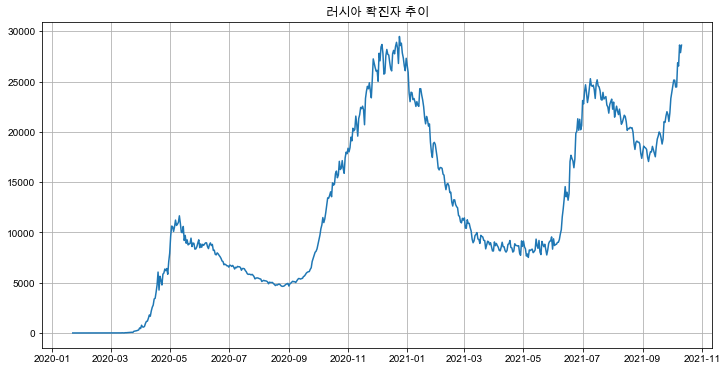

In [541]:
# 전체 데이터 그려보기 
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.title("러시아 확진자 추이")
plt.show()

In [542]:
# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -19.6054
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1262.27     0.0547563        275.42      0.6238      0.6238      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       1280.92    0.00102026       326.416   7.413e-06       0.001      210  LS failed, Hessian reset 
     199       1300.96    0.00916965       220.658           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       1306.41   0.000797137       333.143   4.293e-06       0.001      324  LS failed, Hessian reset 
     291       1319.52   0.000317836       172.122   2.381e-06       0.001      463  LS failed, Hessian reset 
     299       1320.33   0.000642673       88.2809       1.082      0.1082      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,41378.148071,38814.314047,43943.346474
685,2021-12-07,41156.920168,38536.795791,43523.406583
686,2021-12-08,41148.175951,38466.761682,43545.029796
687,2021-12-09,41793.216367,38960.189508,44421.423080
688,2021-12-10,42029.656906,39311.201976,44687.388580


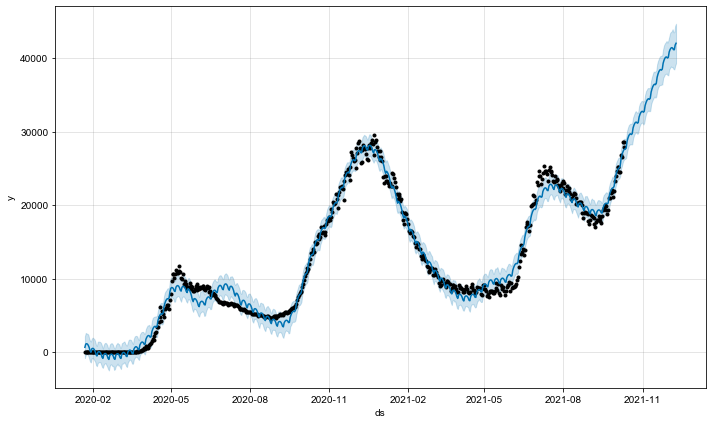

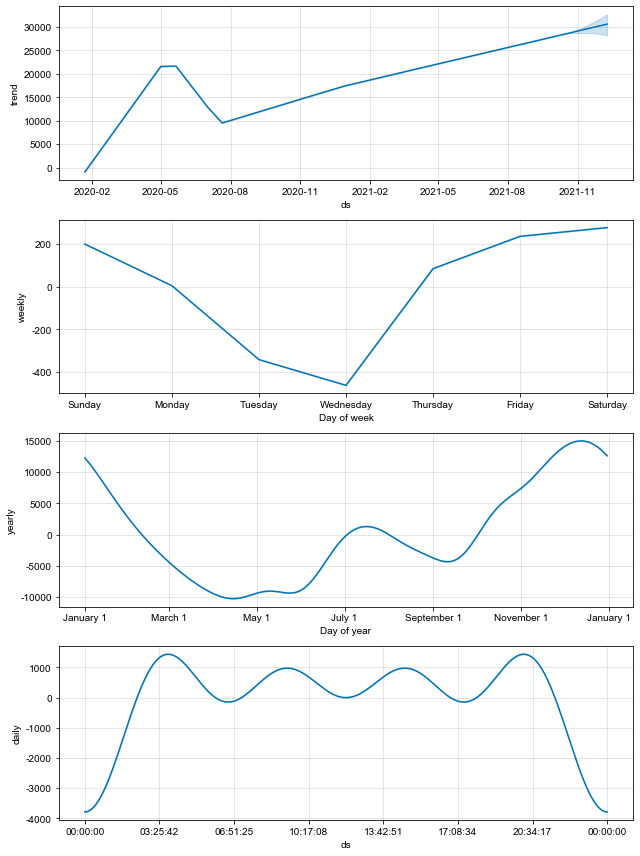

In [543]:
m.plot(forecast);
m.plot_components(forecast);

<그래프 해석>
   
- plot_components를 살펴보자.
    - 주간(weekly) 그래프에서는 수요일이 눈에 띄게 적다.
    - 연간(yearly) 그래프에서는 연말 연초가 높아지는 경향을 보인다.

## 2. 사망자 시계열 분석

### +) 한국 사망자 시계열 분석

In [630]:
df = pd.DataFrame({"ds": deaths_all.date, 
                    "y": deaths_all["kor_death_daily"]})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
del df['index']

# 학습시키기
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Initial log joint probability = -7.5341
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1395.51    0.00793262       134.007      0.2558           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1397.21   0.000962213       84.7643      0.6532      0.6532      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1398.08   1.26223e-06       73.1779           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       1398.08   1.90625e-06       83.9933    2.61e-08       0.001      445  LS failed, Hessian reset 
     335       1398.08   6.94374e-08       64.9643      0.2548      0.6954      464   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds,yhat,yhat_lower,yhat_upper
684,2021-12-06,11.496931,8.154294,14.862733
685,2021-12-07,11.570072,8.368860,15.067366
686,2021-12-08,12.533287,9.124647,15.669817
687,2021-12-09,13.360977,10.095612,16.813426
688,2021-12-10,13.795550,10.643470,17.137993


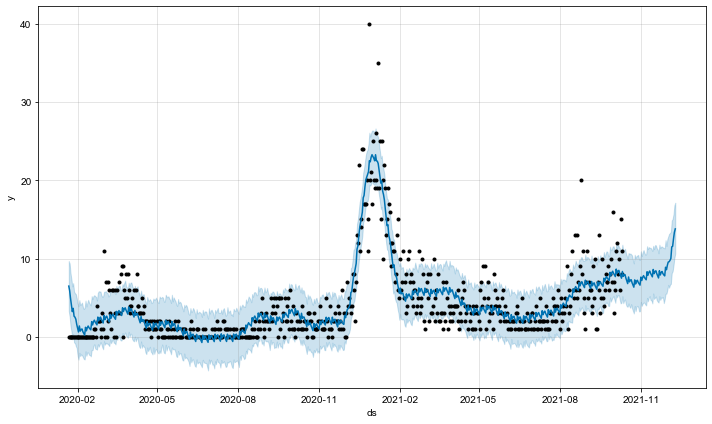

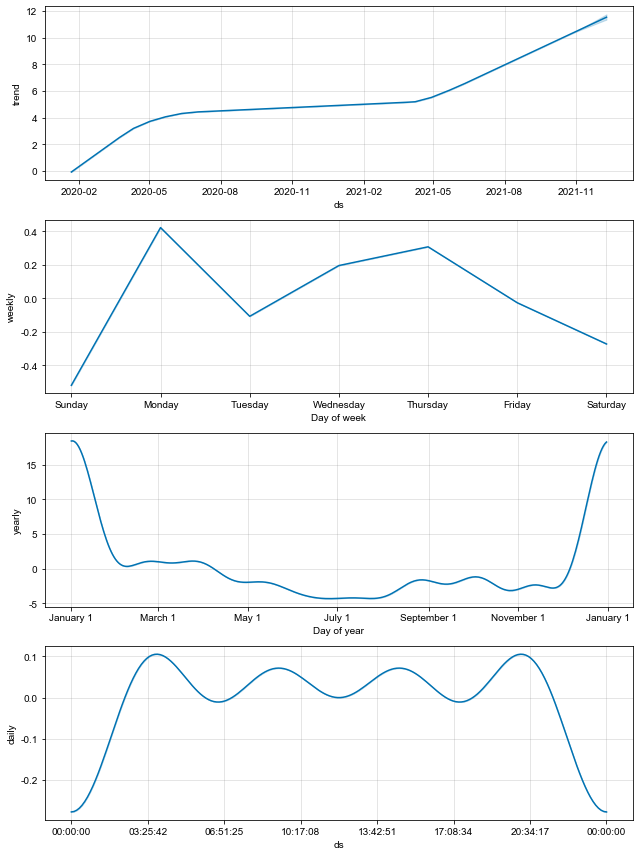

In [631]:
m.plot(forecast);
m.plot_components(forecast);

# 문제 6) 선정한 5개국 기준으로 한국은 어떤가?
- 한국의 현재 현황을 다른 국가와 비교해서 보여주기
- 완치자 수(recovered)로 추가 분석
- time_series_covid19_recovered_global.csv : 세계 완치자 수 시계열 데이터

## 1. 완치자 수 비교

### 1) 완치자수 데이터 추가하기

In [574]:
#recovered data 추가하기

df = pd.read_csv(
    "time_series_covid19_recovered_global.csv",
    encoding='utf-8',
    index_col=1
)

# 정리하기

# 행 열 바꾸기
df_trans=df.transpose()

# 날짜가 기록된 행부터
df_date=df_trans[3:]

# len(df_date)
recovered_global=df_date.rename_axis('date')

# confirmed_global 정리 
recovered_kor = pd.DataFrame(recovered_global.loc[:, "Korea, South"])
recovered_kor['kor_recov_daily'] = recovered_kor['Korea, South'].diff().fillna(recovered_kor['Korea, South'])

recovered_jap = pd.DataFrame(recovered_global.loc[:, "Japan"])
recovered_jap['jap_recov_daily'] = recovered_jap['Japan'].diff().fillna(recovered_jap['Japan'])

recovered_ger = pd.DataFrame(recovered_global.loc[:, "Germany"])
recovered_ger['ger_recov_daily'] = recovered_ger['Germany'].diff().fillna(recovered_ger['Germany'])

recovered_ita = pd.DataFrame(recovered_global.loc[:, "Italy"])
recovered_ita['ita_recov_daily'] = recovered_ita['Italy'].diff().fillna(recovered_ita['Italy'])

recovered_rus = pd.DataFrame(recovered_global.loc[:, "Russia"])
recovered_rus['rus_recov_daily'] = recovered_rus['Russia'].diff().fillna(recovered_rus['Russia'])

recovered_all = pd.concat([recovered_kor,recovered_jap,recovered_ger,recovered_ita,recovered_rus], axis=1)

recovered_all.rename(columns = {
    'Korea, South' : 'kor_recov_sum',
    'Japan' : "jap_recov_sum",
    'Germany' : 'ger_recov_sum',
    'Italy' : 'ita_recov_sum',
    'Russia' : 'rus_recov_sum'
    }, inplace=True)

recovered_all.reset_index(inplace=True)
recovered_all['date'] = pd.to_datetime(recovered_all['date'])


recovered_all.to_csv("time_series_covid19_recovered_global_mj.csv")

recovered_all[560:]

,date,kor_recov_sum,kor_recov_daily,jap_recov_sum,jap_recov_daily,ger_recov_sum,ger_recov_daily,ita_recov_sum,ita_recov_daily,rus_recov_sum,rus_recov_daily
560,2021-08-04,180719,1596,852451,4734,3659260,1110,4144608,3565,5609682,19545
561,2021-08-05,0,-180719,0,-852451,0,-3659260,0,-4144608,0,-5609682
562,2021-08-06,0,0,0,0,0,0,0,0,0,0
563,2021-08-07,0,0,0,0,0,0,0,0,0,0
564,2021-08-08,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
624,2021-10-07,0,0,0,0,0,0,0,0,0,0
625,2021-10-08,0,0,0,0,0,0,0,0,0,0
626,2021-10-09,0,0,0,0,0,0,0,0,0,0
627,2021-10-10,0,0,0,0,0,0,0,0,0,0


In [601]:
recovered_all=recovered_all[:560] #데이터가 없는 부분 제외
recovered_all.head(1)['date'] #2020-01-22
recovered_all.tail(1)['date'] #2021-08-03

559   2021-08-03
Name: date, dtype: datetime64[ns]

### 2) 5개국 완치자 수 비교하기 : 한국, 일본
- 아래 첫번째 그래프는 2020년 1월 22일부터 2021년 8월 3일의 완치자 수를 시각화 한 것이다.
    - 어떤 이유인지는 모르겠으나 300일쯤 일본의 완치자 수가 마이너스 수치를 기록하고 있다.
- 백신이 활성화 된 시기만 따로 보기 위해서, 아래 2번째 그래프는 2021년 1월 1일 이후 그래프를 작성했다.
    - 일본 완치자 수는 일정 주기를 반복하면서 늘었다 줄었다 하는 모습을 보인다.  
    반면에 한국 완치자 수는 2000명을 넘는 경우가 거의 없다.

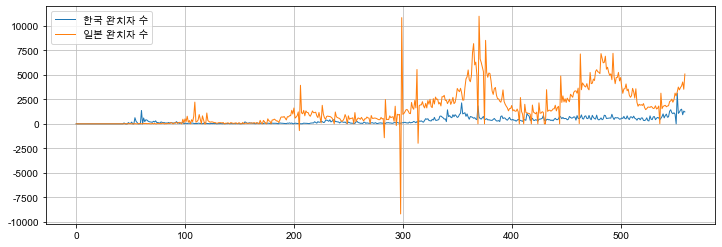

In [619]:
# 완치자 수 그래프 보기 : 한국, 일본

plt.figure(figsize=(12,4))
plt.plot(recovered_all["kor_recov_daily"], lw=1, label='한국 완치자 수')
plt.plot(recovered_all["jap_recov_daily"], lw=1, label='일본 완치자 수')
# plt.plot(recovered_all["ger_recov_daily"], lw=1, label='독일 확진자 수')
# plt.plot(recovered_all["ita_recov_daily"], lw=1, label='이탈리아 확진자 수')
# plt.plot(recovered_all["rus_recov_daily"], lw=1, label='러시아 확진자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [ ]:
recovered_all.loc[345]['date']

Timestamp('2021-01-01 00:00:00')

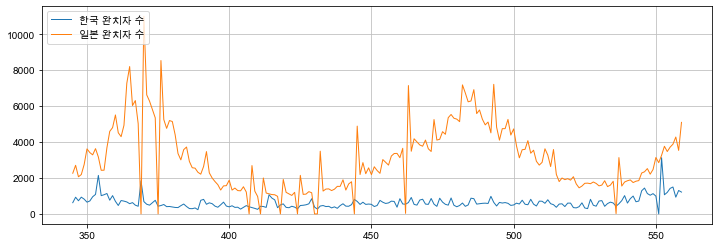

In [618]:
# 완치자 수 그래프 보기 : 한국, 일본 (2021년 이후~)

plt.figure(figsize=(12,4))
plt.plot(recovered_all["kor_recov_daily"][345:], lw=1, label='한국 완치자 수')
plt.plot(recovered_all["jap_recov_daily"][345:], lw=1, label='일본 완치자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

### 3) 5개국 완치자 수 비교하기 : 한국, 독일, 이탈리아
- 아래 그래프는 2020년 1월 22일부터 2021년 8월 3일의 완치자 수를 시각화 한 것이다.
    - 독일과 이탈리아의 완치자 수는 한국에 비해 눈에 띄게 백신 보급 이후에 크게 증가한 것으로 확인할 수 있다.

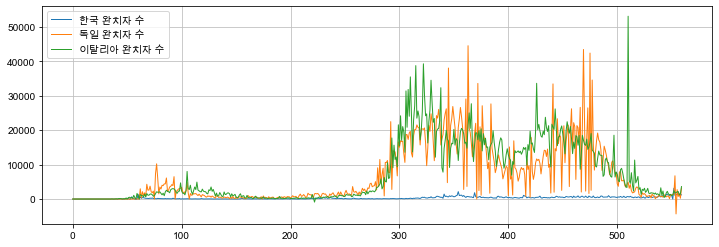

In [617]:
# 완치자 수 그래프 보기 : 한국, 독일, 이탈리아

plt.figure(figsize=(12,4))
plt.plot(recovered_all["kor_recov_daily"], lw=1, label='한국 완치자 수')
plt.plot(recovered_all["ger_recov_daily"], lw=1, label='독일 완치자 수')
plt.plot(recovered_all["ita_recov_daily"], lw=1, label='이탈리아 완치자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

### 4) 5개국 완치자 수 비교하기 : 한국, 러시아
- 아래 그래프는 2020년 1월 22일부터 2021년 8월 3일의 완치자 수를 시각화 한 것이다.
    - 러시아는 한국에 비해 완치자 수가 꾸준하게 많다.

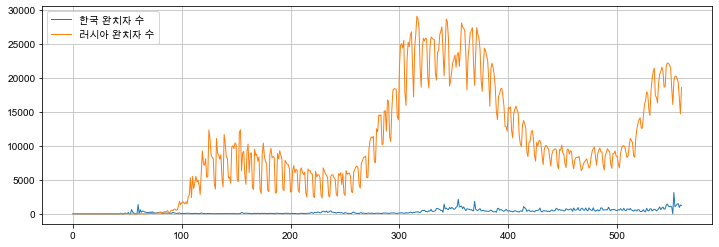

In [627]:
# 완치자 수 그래프 보기 : 한국, 러시아

plt.figure(figsize=(12,4))
plt.plot(recovered_all["kor_recov_daily"], lw=1, label='한국 완치자 수')
plt.plot(recovered_all["rus_recov_daily"], lw=1, label='러시아 완치자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

### 4) 한국 완치자 수 따로 살펴보기
- 아래 그래프는 2020년 1월 22일부터 2021년 8월 3일의 완치자 수를 시각화 한 것이다.
    - 위에서 살펴봤을 때 상대적으로는 증가폭이 작아보였으나 백신 보급 이후로 완치자 수는 다소 증가한 것이 드러난다

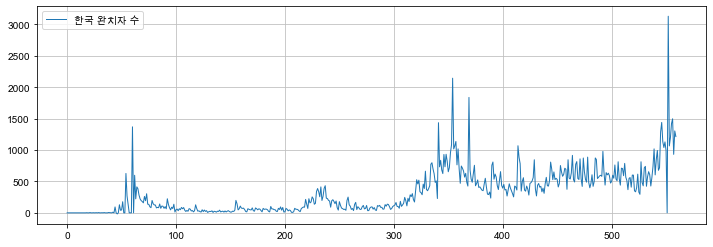

In [621]:
plt.figure(figsize=(12,4))
plt.plot(recovered_all["kor_recov_daily"], lw=1, label='한국 완치자 수')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

## 2. 확진자 (문제 4, 5) 요약 및 정리

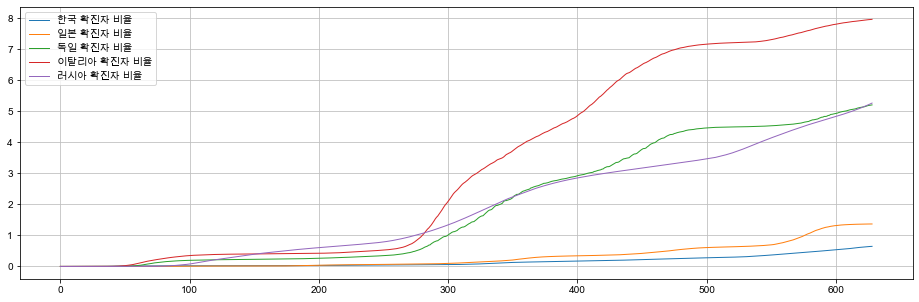

In [633]:
# 1) 한국은 다른 나라에 비해서 인구 수 대비 확진자의 비율이 낮은 편이다. 
confRatePlot()

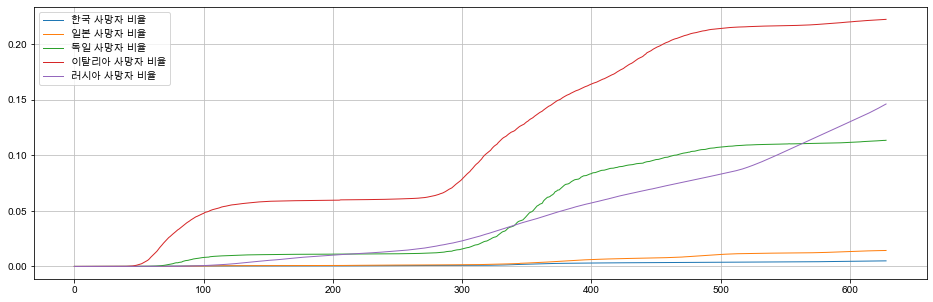

In [635]:
# 2) 한국은 다른 나라에 비해서 인구 수 대비 사망자의 비율도 낮은 편이다.
deathRatePlot()


1)과 2)의 그래프를 보면 일본과 한국, 러시아와 독일, 이탈리아 이렇게 확진자와 사망자 비율이 저, 중, 고 수준으로 나눠볼 수 있다.

3\) 한국의 시계열 분석 그래프 해석 요약 
 - 2020년 3월 두드러진 상승세
 - 2020년 12월 ~ 2021년 1월 급격한 상승과 하락
 - 2021년 7월 확진자 급격하게 증가하는 추세
 - 화~금 높은 경향 (주말<평일)

4\) 일본의 시계열 분석 그래프 해석 요약
 - 2020년 9월, 2021년 1, 5, 8~9월 두드러진 상승세
 - 수~토 높은 경향

5\) 독일의 시계열 분석 그래프 해석 요약
 - 수요일 높은 경향
 - 4월과 11~1월에 높은 경향

6\) 이탈리아 시계열 분석 그래프 해석 요약
 - 월요일에서 토요일로 갈수록 점점 많아지는 경향
 - 11월에 급격하게 높아지는 경향

7\) 러시아의 시계열 분석 그래프 해석 요약
 - 수요일에 급격하게 적어지는 경향
 - 연말 연초 (12~1월) 높아지는 경향

3)~7) 까지의 분석 내용을 살펴보면 2020년 11월부터 2021년 1월까지 코로나의 확산세가 전세계적으로 급격히 커지게 된 것을 알 수 있다. 
이탈리아, 러시아의 경우 평일보다 주말에 확진자 수가 더 많이 집계되었다. 반대로 한국, 일본, 독일의 경우 평일이 더 많이 집계되었다. 
예측컨데 한국은 월요일에서 금요일까지 출근을 해서 근무하거나, 등교를 하는 등의 이동 활동이 더 잦은 것이 아닐까 생각한다.



# 문제 7) 의료 수준 대비 covid-19 데이터 정리 + 인구대비 상황 고려
- 의료 수준을 판단할 데이터 
    - 미국 워싱턴대학 '보건 계측 및 평가 연구소'(IHME)의 '1차 보건의료 접근성 및 품질'(HAQ) 지수
(http://www.healthdata.org/results/country-profiles/haq)
    - 뉴스 참고 : https://www.yna.co.kr/view/AKR20170522155500009

- 이를 반영한 결과가 문제 6의 결과와 상이한지 판단
- 파일명 : IHME_GBD_2015_HAQ_INDEX_1990_2015_HAQ_SDI_FRONTIER_Y2017M05D18.CSV
    - local_name과 val 열을 이용해서 의료 수준 기준으로 판단하고 분석 진행


In [800]:
df = pd.read_csv("IHME_GBD_2015_HAQ_INDEX_1990_2015_HAQ_SDI_FRONTIER_Y2017M05D18.csv", encoding='utf-8', usecols=[1,2,4])

df_new = df[df['year_id']==2015]

df= df_new[['location_name','val']]

new = (df.location_name == 'South Korea') | (df.location_name == 'Japan') | (df.location_name == 'Germany') | (df.location_name == 'Italy') | (df.location_name == 'Russia')

df_HAQ=df[new]

df_HAQ

,location_name,val
359,Russia,88.1
389,Japan,90.4
395,South Korea,89.0
473,Germany,90.6
503,Italy,88.1


In [801]:
# 가장 최근의 인구수 대비 확진자 수 (비율) : 문제 4의 confirmed_rate 정리

df=confirmed_rate.tail(1)
 
df_new=df.transpose()

df_conf=df_new.rename(columns=df_new.iloc[0]).drop(df_new.index[0])

df_conf.reset_index(inplace=True)
df_conf.rename(columns={'index':'location_name', '10/11/21':'rate'}, inplace=True)

df_conf.loc[0][0] = 'South Korea'
df_conf.loc[1][0] = 'Japan'
df_conf.loc[2][0] = 'Germany'
df_conf.loc[3][0] = 'Italy'
df_conf.loc[4][0] = 'Russia'

df_conf

,location_name,rate
0,South Korea,0.646706
1,Japan,1.367404
2,Germany,5.20075
3,Italy,7.954555
4,Russia,5.259291


In [802]:
# df_conf 정규화

ls = []

for i in df_conf.values.tolist():
    ls.append(i[1])
print(ls)

df_conf['rate'] = (df_conf['rate']-min(ls)) / (max(ls)-min(ls))

df_conf

[0.6467057348306958, 1.3674043606740676, 5.20074965158187, 7.954555432315506, 5.259290975026752]


,location_name,rate
0,South Korea,0.0
1,Japan,0.09862
2,Germany,0.623172
3,Italy,1.0
4,Russia,0.631182


In [803]:
# 연결하기 : HAQ 점수(높을 수록 좋음)와 확진자 비율(낮을 수록 좋음, 정규화)

df_com=pd.merge(df_HAQ,df_conf)
df_com

,location_name,val,rate
0,Russia,88.1,0.631182
1,Japan,90.4,0.09862
2,South Korea,89.0,0.0
3,Germany,90.6,0.623172
4,Italy,88.1,1.0
